# Problema: Dataset de pingüinos:

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

### Cargar el dataset
df = sns.load_dataset('penguins')
```


1. ¿Cuántas especies diferentes de pingüinos hay en el dataset?


2. ¿Cuál es la longitud media del pico de los pingüinos de la especie Adelie?

3. ¿Cuál es la masa corporal promedio de los pingüinos de la especie Gentoo?

4. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos?

5. ¿Cuál es la isla con mayor número de pingüinos en el dataset?

6. ¿Cuál es la desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap?

7. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

8. ¿Cuál es la proporción de machos y hembras en la especie Adelie?

9. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

10. ¿Cuál es la distribución de la masa corporal entre las especies de pingüinos?

11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

12. ¿Cuántos pingüinos tienen una masa corporal superior a 5000 gramos?

13. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

14. ¿Cuál es la relación entre la longitud de la aleta y la masa corporal en los pingüinos de la especie Gentoo?

15. ¿Cuántos pingüinos tienen datos faltantes en alguna de sus características?

16. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

17. ¿Cuál es la diferencia en masa corporal promedio entre machos y hembras de la especie Chinstrap?

18. ¿Qué especie de pingüino tiene la longitud de aleta promedio más alta?

19. ¿Cuál es la longitud del pico más pequeña registrada en el dataset y de qué especie es?

20. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos de la especie Adelie?

## solucion: dataset de pingüinos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Para tratar los datos faltantes elimina todos los registros que contengan valores faltantes en el campo `body_mass_g` o `bill_length_mm`, pues buscaremos ver si hay alguna correlación entre la longitud del pico y la masa corporal con el sexo del pingüino para rellenar los datos faltantes del campo `sex`.

In [ ]:
df.dropna(axis=0, subset=["body_mass_g", "bill_length_mm"], inplace=True)
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

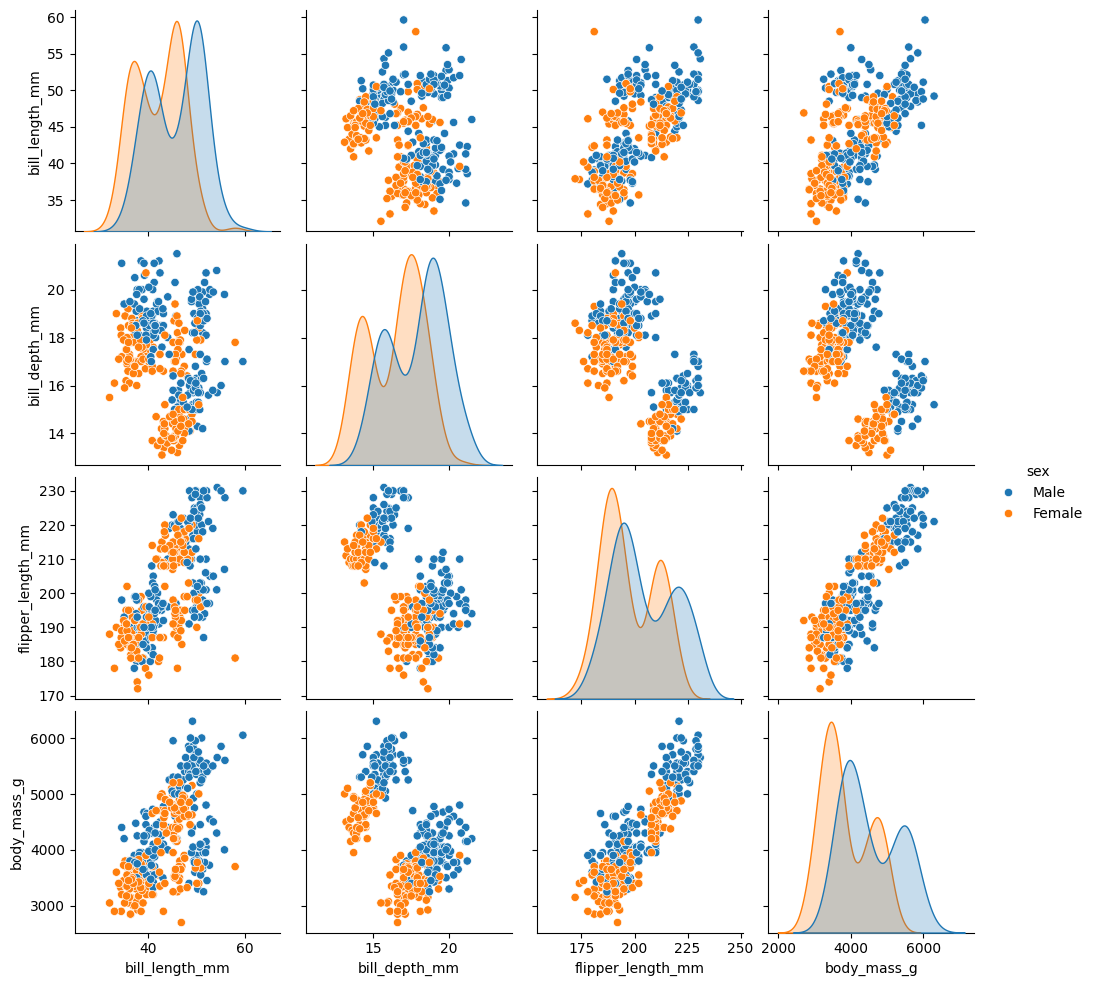

In [ ]:
sns.pairplot(df, hue="sex")
plt.show()

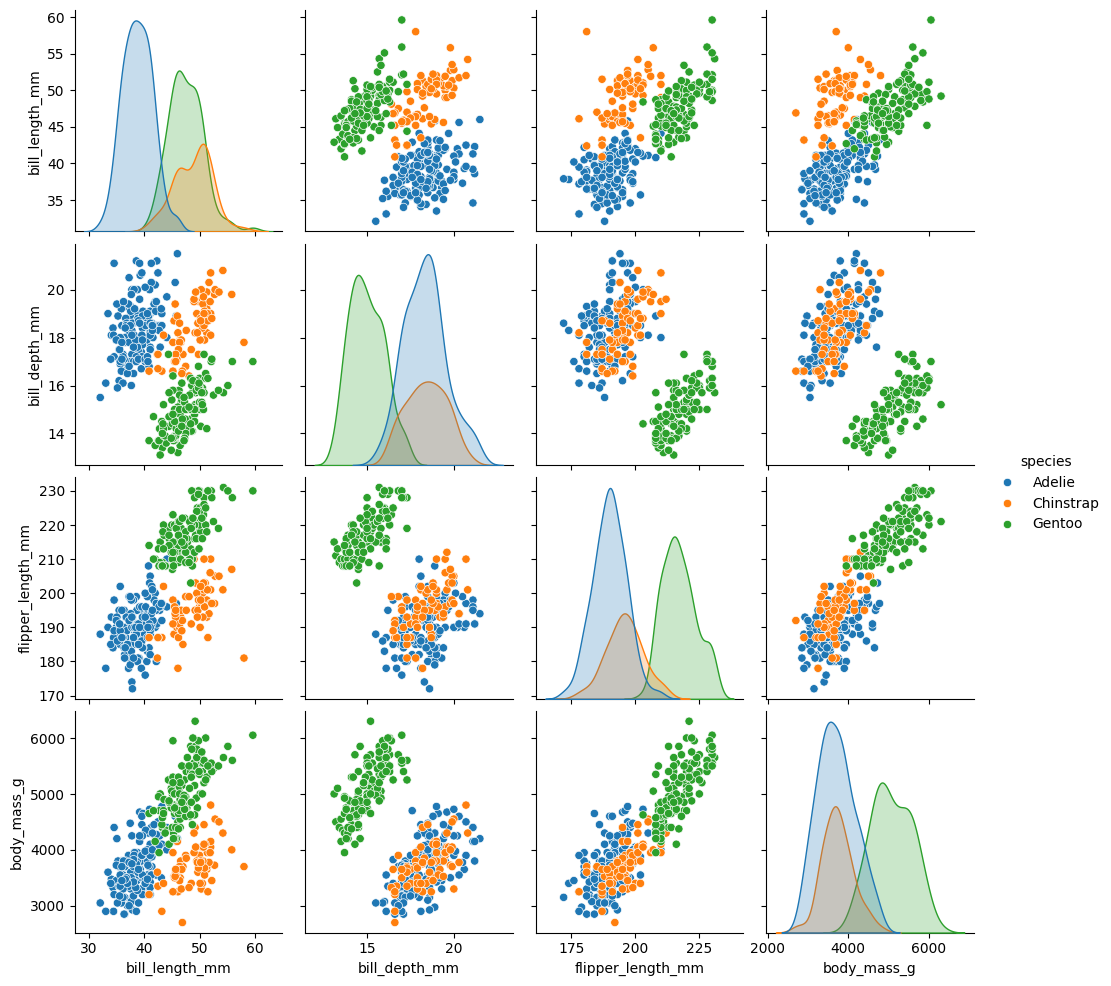

In [ ]:
sns.pairplot(df, hue="species",)
plt.show()

### 1. ¿Cuántas especies diferentes de pingüinos hay en el dataset?

In [ ]:
df.species.nunique()

3

In [ ]:
df.species.value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

### 2. ¿Cuál es la longitud media del pico de los pingüinos de la especie Adelie?

In [ ]:
df.groupby("species")["bill_length_mm"].mean().Adelie

38.79139072847682

In [ ]:
df.groupby("species")["bill_length_mm"].mean()

species
Adelie       38.791391
Chinstrap    48.833824
Gentoo       47.504878
Name: bill_length_mm, dtype: float64

### 3. ¿Cuál es la masa corporal promedio de los pingüinos de la especie Gentoo?

In [ ]:
df.groupby("species")["body_mass_g"].mean().Gentoo

5076.016260162602

In [ ]:
df.groupby("species")["body_mass_g"].mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

### 4. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos?

In [ ]:
df[['body_mass_g', 'bill_length_mm']].corr(method='pearson')

body_mass_g  bill_length_mm
body_mass_g         1.00000         0.59511
bill_length_mm      0.59511         1.00000

In [ ]:
correlation = df[['body_mass_g', 'bill_length_mm']].corr(method='pearson').iloc[0,1]
correlation

0.5951098244376295

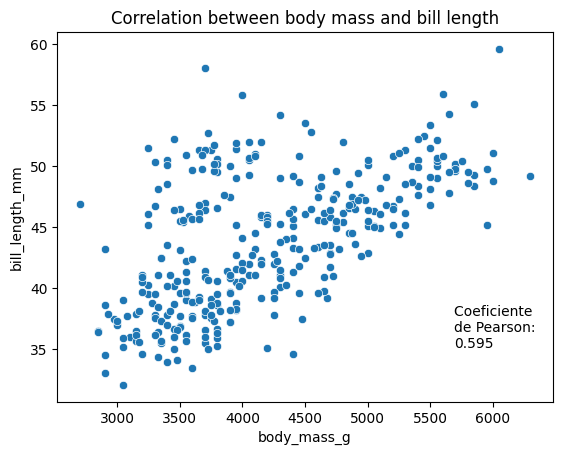

In [ ]:
PCC_string = 'Coeficiente \nde Pearson:\n{:.3f}'.format(correlation)
sns.scatterplot(data=df, x="body_mass_g", y="bill_length_mm",)
plt.annotate(PCC_string,
             xy=(0.8, 0.2), xycoords='axes fraction', ha='left', va='center')
plt.title("Correlation between body mass and bill length")
plt.show()

### 5. ¿Cuál es la isla con mayor número de pingüinos en el dataset?

In [ ]:
df.island.value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [ ]:
df.island.value_counts().idxmax()

'Biscoe'

### 6. ¿Cuál es la desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap?

In [ ]:
df.groupby("species")["flipper_length_mm"].std().Chinstrap

7.1318942585781455

In [ ]:
df.groupby("species")["flipper_length_mm"].std()

species
Adelie       6.539457
Chinstrap    7.131894
Gentoo       6.484976
Name: flipper_length_mm, dtype: float64

### 7. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

In [ ]:
df.bill_length_mm.max()

59.6

In [ ]:
df.loc[df.bill_length_mm.idxmax()]

species              Gentoo
island               Biscoe
bill_length_mm         59.6
bill_depth_mm          17.0
flipper_length_mm     230.0
body_mass_g          6050.0
sex                    Male
Name: 253, dtype: object

In [ ]:
df.iloc[df.bill_length_mm.argmax()]

species              Gentoo
island               Biscoe
bill_length_mm         59.6
bill_depth_mm          17.0
flipper_length_mm     230.0
body_mass_g          6050.0
sex                    Male
Name: 253, dtype: object

### 8. ¿Cuál es la proporción de machos y hembras en la especie Adelie?

In [ ]:
df.groupby("species")["sex"].value_counts().Adelie

sex
Female    73
Male      73
Name: count, dtype: int64

### 9. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

In [ ]:
df.groupby("species")[["bill_length_mm", "body_mass_g"]].corr(method='pearson')

bill_length_mm  body_mass_g
species                                              
Adelie    bill_length_mm        1.000000     0.548866
          body_mass_g           0.548866     1.000000
Chinstrap bill_length_mm        1.000000     0.513638
          body_mass_g           0.513638     1.000000
Gentoo    bill_length_mm        1.000000     0.669166
          body_mass_g           0.669166     1.000000

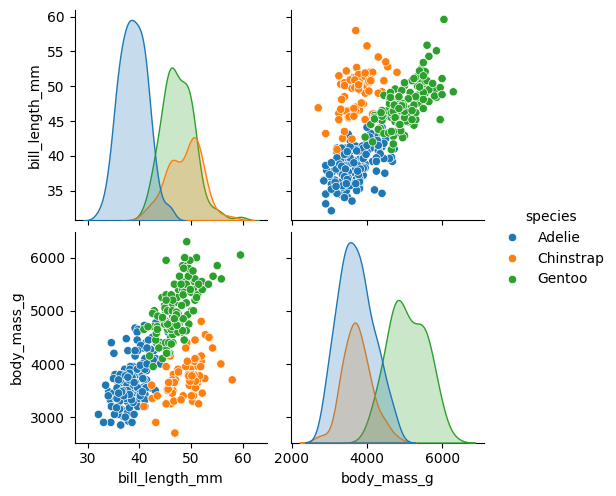

In [ ]:
sns.pairplot(df[["bill_length_mm", "body_mass_g", "species"]], hue="species",)
plt.show()

Existe una correlación positiva entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos. Los coeficientes de Pearson son mayores a $0.5$ . 

### 10. ¿Cuál es la distribución de la masa corporal entre las especies de pingüinos?

<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

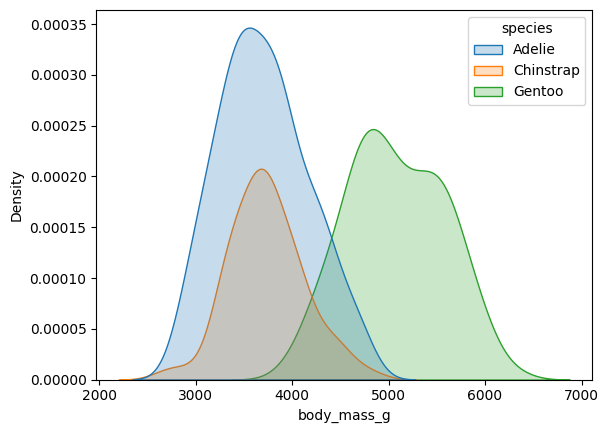

In [ ]:
sns.kdeplot(data=df, x="body_mass_g", hue="species", fill=True)

<AxesSubplot: xlabel='body_mass_g', ylabel='Count'>

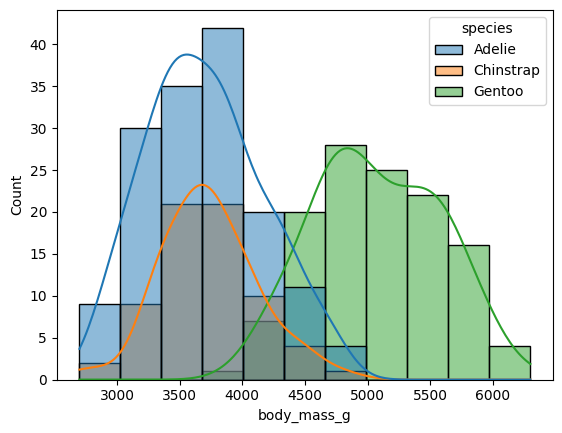

In [ ]:
sns.histplot(data=df, x="body_mass_g", hue="species", kde=True)

<AxesSubplot: xlabel='body_mass_g', ylabel='Count'>

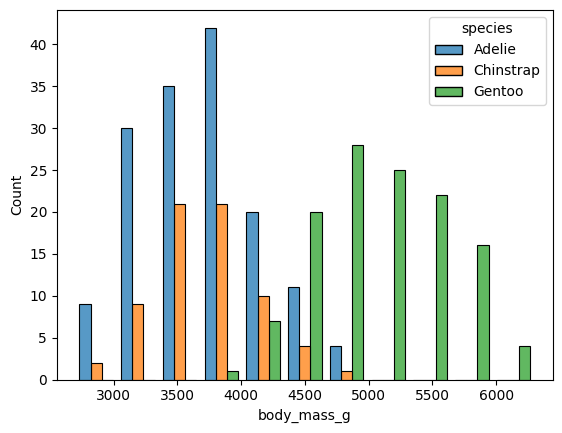

In [ ]:
sns.histplot(data=df, x="body_mass_g", hue="species", multiple="dodge", shrink=0.8)

### 11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

In [ ]:
df.groupby("species")["flipper_length_mm"].agg(["min", "max"])

min    max
species                
Adelie     172.0  210.0
Chinstrap  178.0  212.0
Gentoo     203.0  231.0

### 12 . ¿Cuántos pingüinos tienen una masa corporal superior a 5000 gramos?

In [ ]:
(df.body_mass_g > 5000).sum()

61

### 13. ¿Cómo varia la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

In [ ]:
df.pivot_table(index='species', columns='island', values='bill_length_mm', aggfunc= np.std)

/tmp/ipykernel_131/3300766040.py:1: FutureWarning: The provided callable <function std at 0x7fe0580909d0> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.pivot_table(index='species', columns='island', values='bill_length_mm', aggfunc= np.std)


island       Biscoe     Dream  Torgersen
species                                 
Adelie     2.480916  2.465359   3.025318
Chinstrap       NaN  3.339256        NaN
Gentoo     3.081857       NaN        NaN

### 14. ¿Cuál es la relación entre la longitud de la aleta y la masa corporal en los pingüinos de la especie Gentoo?

In [ ]:
df[df.species == 'Gentoo'][['flipper_length_mm', 'body_mass_g']].corr(method='pearson').iloc[0,1]

0.7026665243575185

In [ ]:
df.groupby("species")[["flipper_length_mm", "body_mass_g"]].corr(method='pearson')

flipper_length_mm  body_mass_g
species                                                    
Adelie    flipper_length_mm           1.000000     0.468202
          body_mass_g                 0.468202     1.000000
Chinstrap flipper_length_mm           1.000000     0.641559
          body_mass_g                 0.641559     1.000000
Gentoo    flipper_length_mm           1.000000     0.702667
          body_mass_g                 0.702667     1.000000

### 15. ¿Cuántos pingüinos tienen datos faltantes en alguna de sus características?

In [ ]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

### 16. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

In [ ]:
df.pivot_table(index='species', columns='island', values='bill_length_mm', aggfunc= np.std)

/tmp/ipykernel_131/3300766040.py:1: FutureWarning: The provided callable <function std at 0x7fe0580909d0> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.pivot_table(index='species', columns='island', values='bill_length_mm', aggfunc= np.std)


island       Biscoe     Dream  Torgersen
species                                 
Adelie     2.480916  2.465359   3.025318
Chinstrap       NaN  3.339256        NaN
Gentoo     3.081857       NaN        NaN

In [ ]:
df.pivot_table(index='species', columns='island', values='bill_length_mm', aggfunc= np.std).max()

/tmp/ipykernel_131/1218732284.py:1: FutureWarning: The provided callable <function std at 0x7fe0580909d0> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.pivot_table(index='species', columns='island', values='bill_length_mm', aggfunc= np.std).max()


island
Biscoe       3.081857
Dream        3.339256
Torgersen    3.025318
dtype: float64

In [ ]:
df.pivot_table(index='species', columns='island', values='bill_length_mm', aggfunc= np.std).max().idxmax()

/tmp/ipykernel_131/2324771484.py:1: FutureWarning: The provided callable <function std at 0x7fe0580909d0> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.pivot_table(index='species', columns='island', values='bill_length_mm', aggfunc= np.std).max().idxmax()


'Dream'

### 17. ¿Cuál es la diferencia en masa corporal entre machos y hembras en la especie Chinstrap?

In [ ]:
df[(df.species == 'Chinstrap') & (df.sex == 'Male')]['body_mass_g'].mean() - df[(df.species == 'Chinstrap') & (df.sex == 'Female')]['body_mass_g'].mean()

411.76470588235316

### 18. ¿Qué especie de pingüino tiene la longitud de aleta promedio más alta?

In [ ]:
df.groupby("species")["flipper_length_mm"].mean()

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

In [ ]:
df.groupby("species")["flipper_length_mm"].mean().idxmax()

'Gentoo'

### 19. ¿Cuál es la longitud del pico más pequeña registrada en el dataset y de qué especie es?

In [ ]:
df.groupby("species")["bill_length_mm"].min()

species
Adelie       32.1
Chinstrap    40.9
Gentoo       40.9
Name: bill_length_mm, dtype: float64

In [ ]:
df.groupby("species")["bill_length_mm"].min().idxmin()

'Adelie'

### 20. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos de la especie Adelie?

In [ ]:
df[df.species == 'Adelie'].groupby("sex")["flipper_length_mm"].agg(["mean", "std"])

mean       std
sex                         
Female  187.794521  5.595035
Male    192.410959  6.599317

Esto indica que la longitud de la aleta promedio de los pingüinos de la especie Adelie es más alta en los machos que en las hembras.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=03decb01-b1f3-4b0e-a20b-89c85b26959a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>